In [ ]:
!pip install spacytextblob

In [ ]:
!pip install spacy download es_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached download-0.3.5-py3-none-any.whl (8.8 kB)
  Using cached es_core_news_sm-3.1.0-py3-none-any.whl (13.7 MB)
  Using cached spacy-3.1.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.1 MB)
  Using cached spacy-3.1.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.1 MB)
  Using cached spacy-3.1.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.1 MB)
  Using cached spacy-3.1.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.1 MB)
  Using cached spacy-3.1.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.1 MB)
  Using cached spacy-3.1.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.1 MB)
  Using cached spacy-3.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached spacy-3.1.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
INFO: pip is looking at multiple vers

In [ ]:
import pandas as pd
import numpy as np
import spacy
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from spacytextblob.spacytextblob import SpacyTextBlob

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Funciones

def get_week(date):
    fecha = date.week
    return(fecha)

def get_day(date):
    fecha = date.day
    return fecha

def get_day_of_week(date):
    fecha = date.day_name()
    return fecha

def get_month(date):
    fecha = date.month_name()
    return fecha

def get_year(date):
    fecha = date.year
    return fecha

def text_length(text):
    x=len(text)
    return x

def lower_text(text):
    lowered = text.lower()
    return(lowered)    

def remove_stopwords(text):
    tokens = word_tokenize(text)
    remove = [token for token in tokens if token not in stop_words]
    return ' '.join(remove)

def get_2ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:10]    

def get_3ngrams(text, ngram_from=3, ngram_to=3, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:10]

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/rivera-squared/Jay_Fonseca/main/jay_fonseca/text_analysis/topic%20modeling/jay_fonseca_tmodeling.csv')

In [ ]:
nlp = spacy.load('es_core_news_sm')

/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
# Traduciendo los nombre de los meses de inglés a español
def mes_sp(mes):
  if mes == "January":
    return "Enero"
  elif mes == "February":
    return "Febrero"
  elif mes == "March":
    return "Marzo"
  elif mes == "April":
    return "Abril"
  elif mes == "May":
    return "Mayo"
  elif mes == "June":
    return "Junio"
  elif mes == "July":
    return "Julio"
  elif mes == "August":
    return "Agosto"
  elif mes == "September":
    return "Septiembre"
  elif mes == "October":
    return "Octubre"
  elif mes == "November":
    return "Noviembre"
  else:
    return "Diciembre" 

In [ ]:
df['fecha']=pd.to_datetime(df['fecha'])
df['mes']=df['mes'].apply(mes_sp)

In [ ]:
stop_words = stopwords.words('spanish')
stop_words.extend(['puerto','rico','hoy','si','urrutia', 'según', 'explicó'])

In [ ]:
# Text Preprocessing

df['resumen']=df['resumen'].apply(lower_text)
df['resumen']=df['resumen'].apply(remove_stopwords)

In [ ]:
df=df[(df['año'] ==2022)]
df=df.sort_values(by=['fecha'])

In [ ]:
meses = list(df.mes.unique())

In [ ]:
meses

['Enero',
 'Febrero',
 'Marzo',
 'Abril',
 'Mayo',
 'Junio',
 'Julio',
 'Agosto',
 'Septiembre',
 'Octubre',
 'Noviembre',
 'Diciembre']

In [ ]:
x_meses=[]
for mes in meses:
    x=df[(df['mes']==mes)]
    ngram2 = get_2ngrams(x['resumen'])
    ngram3 = get_3ngrams(x['resumen'])
    x_df=pd.DataFrame({
        'mes':mes,
        '2frases':np.array(ngram2)[:,0],
        '2frases_freq':np.array(ngram2)[:,1],
        '3frases':np.array(ngram3)[:,0],
        '3frases_freq':np.array(ngram3)[:,1]
        })
    x_meses.append(x_df)
x_meses=pd.concat(x_meses)  

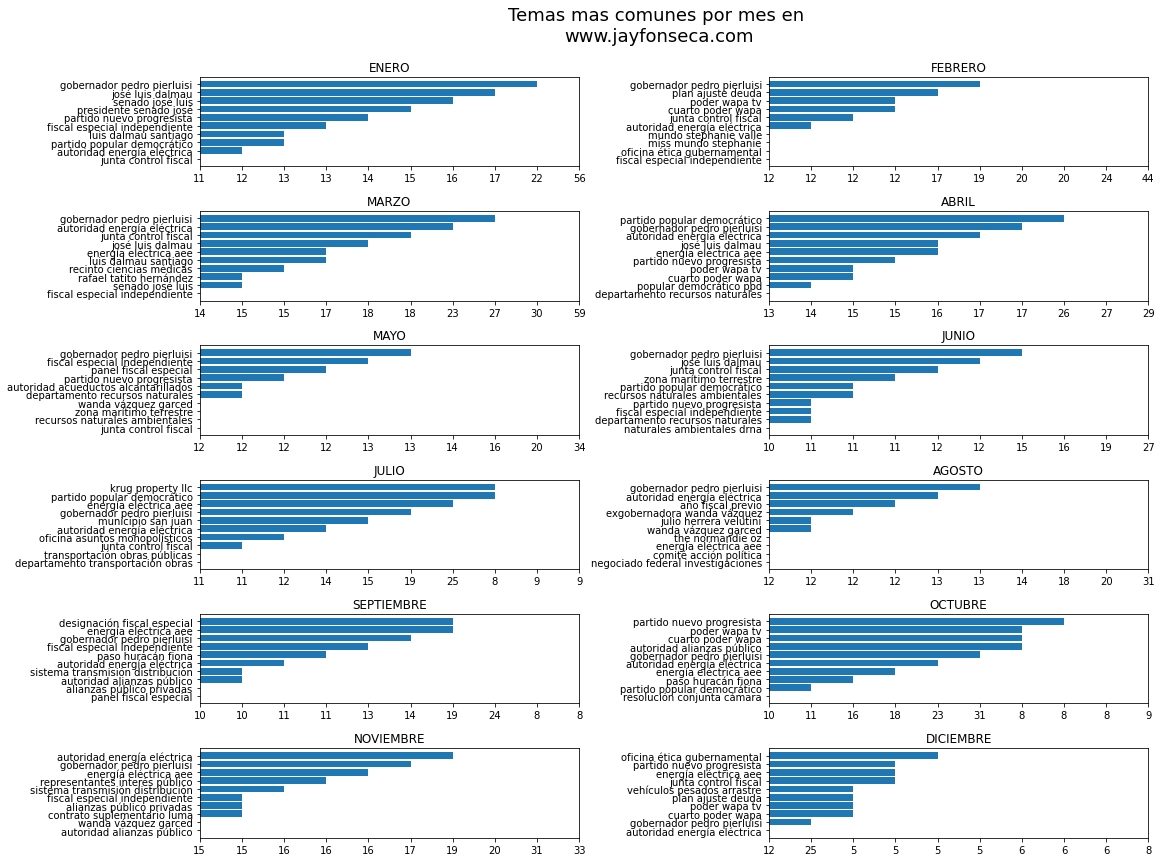

In [ ]:
# define subplot grid
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
plt.suptitle("Temas mas comunes por mes en \nwww.jayfonseca.com", fontsize=18, y=0.95)

for n, mes in enumerate(meses):
    ax=plt.subplot(6,2, n+1)
    
    x=x_meses[x_meses['mes']==mes]
    x=x.sort_values(by=['3frases_freq'])
    plt.barh(y = x['3frases'], width = x['3frases_freq']);
    plt.xticks(range(len(x['3frases_freq'])), x['3frases_freq'])
    ax.set_title(mes.upper())
    ax.set_xlabel("")   